In [290]:
# import required libraies

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [275]:
# store the data to df from .csv file

df = pd.read_csv('diamonds.csv',nrows=1000)

In [276]:
df.shape

(1000, 10)

In [277]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
995,0.54,Ideal,D,VVS2,61.4,52.0,2897,5.30,5.34,3.26
996,0.72,Ideal,E,SI1,62.5,55.0,2897,5.69,5.74,3.57
997,0.72,Good,F,VS1,59.4,61.0,2897,5.82,5.89,3.48
998,0.74,Premium,D,VS2,61.8,58.0,2897,5.81,5.77,3.58


In [278]:
# checking if there are any null values

df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

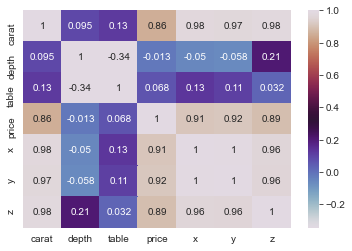

In [279]:
# check for collinearity. If its >0.75, delete one of the column. else it may effect the accuracy

import seaborn as sns
# checking for multicollinearity
# plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="twilight",annot=True)

- We can clearly see that columns x,y,z,carat are higly correlated >0.95. Hence keep any one column and drop the remaining

In [280]:
df.drop('x',axis=1,inplace=True)
df.drop('y',axis=1,inplace=True)
df.drop('z',axis=1,inplace=True)

C:\Users\Vikitha Reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

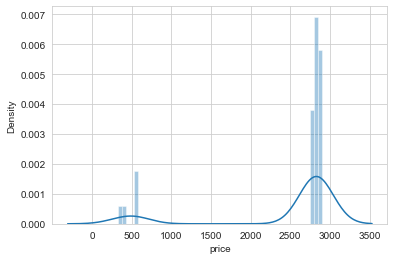

In [281]:
# Visualization

sns.distplot(df["price"])

Text(0.5, 1.0, 'Price vs Carat')

<Figure size 1008x432 with 0 Axes>

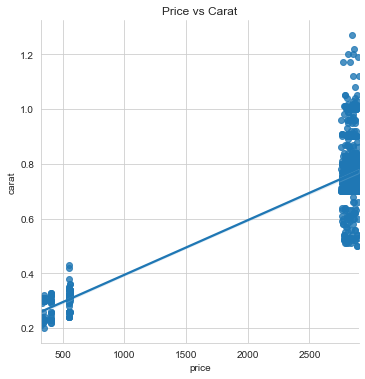

In [282]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.lmplot(x="price",y="carat",data=df, palette ='plasma')
plt.title('Price vs Carat')

In [283]:
# Seperating target and dependent features

X = df.drop('price',axis=1)
y = df['price']

In [284]:
# seperating categorical and numerical columns.

cat_columns = X.select_dtypes(include='object')
num_columns = X.select_dtypes(include='number')

In [285]:
num_columns.describe(percentiles=[0.01,0.10,0.15,0.25,0.50,0.75,0.90,0.99])

,carat,depth,table
count,1000.000000,1000.000000,1000.000000
mean,0.689280,61.722800,57.734700
std,0.195291,1.758879,2.467946
min,0.200000,53.000000,52.000000
1%,0.230000,56.897000,53.000000
10%,0.310000,59.690000,55.000000
15%,0.489500,60.200000,55.000000
25%,0.700000,60.900000,56.000000
50%,0.710000,61.800000,57.000000
75%,0.790000,62.600000,59.000000


- According to standard normal distribution, 99.6% of values lies between +/- 3 standard deviations. Hence, capping the extreme values occuring after 3 SD which are generally considered as out;iers.

In [287]:
def outliers(X):
    X = X.clip(lower=X.quantile(0.01))
    X = X.clip(upper=X.quantile(0.99))
    return(X)

In [288]:
# Capping and flooring the Extreme values
num_columns = num_columns.apply(lambda X: outliers(X))

In [289]:
# No columns with zero variance
from sklearn.feature_selection import VarianceThreshold
try:
    var_thresh = VarianceThreshold(threshold=0.0)
    var_thresh.fit_transform(num_columns)
except ValueError:
    cols=var_thresh.get_support()
    cols

In [291]:
# Encoding the categorical columns to convert them to numerical. 

encoder = LabelEncoder()
for i in cat_columns:
    cat_columns[i] = encoder.fit_transform(cat_columns[i])
cat_columns

<ipython-input-291-33e60d98a6dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_columns[i] = encoder.fit_transform(cat_columns[i])


,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
995,2,0,7
996,2,1,2
997,1,2,4
998,3,0,5


In [292]:
# Concatenatiing both numerical and categorical columns to form a final df after EDA, feature engineering and encoding.

X_all = pd.concat([num_columns,cat_columns],axis=1,join='inner')
X_all

,carat,depth,table,cut,color,clarity
0,0.2300,61.5,55.0,2,1,3
1,0.2300,59.8,61.0,3,1,2
2,0.2300,56.9,65.0,1,1,4
3,0.2900,62.4,58.0,3,5,5
4,0.3100,63.3,58.0,1,6,3
...,...,...,...,...,...,...
995,0.5400,61.4,53.0,2,0,7
996,0.7200,62.5,55.0,2,1,2
997,0.7200,59.4,61.0,1,2,4
998,0.7400,61.8,58.0,3,0,5


In [293]:
# Splitting the data to train and test in the ratio of 75:25

X_train,X_test,y_train,y_test = train_test_split(X_all.values, y.values, train_size=0.75, random_state=19)

In [294]:
# As KNN calculates distance, it's mandatory to scale the data else algorithm might give more priority to values whcih are higher.
# StandardScaler makes the data noormally distributed with mean=0 and standard deviation =1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building of KNN Algorithm from scatch

In [295]:
class KNN:
    
    import numpy as np
    from scipy import stats


    def __init__(self, k, problem: int=0, metric: int=0):
        """
            Parameters
            ----------
            k: Number of nearest self.neighbors
            problem: Type of learning
            0 = Regression, 1 = Classification
            metric: Distance metric to be used. 
            0 = Euclidean, 1 = Manhattan
        """
        self.k = k
        self.problem = problem
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        import numpy as np
        from scipy import stats

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []
        # print(m,n)

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                if self.metric == 0:
                    d = (np.sqrt(np.sum(np.square(X_test[i,:] - self.X_train[j,:]))))  # Euclidean distance
#                     print(d)
                else:
                    d = (np.absolute(X_test[i, :] - self.X_train[j,:]))  # Manhattan distance
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred

In [296]:
bknn = KNN(k=2, problem=0, metric=0)
# model fitting
bknn.fit(X_train, y_train)
# predicting
b_y_pred = bknn.predict(X_test)

In [310]:
print('Accuracy of Scratch Model:',r2_score(y_test,b_y_pred))
print('MSE of Scratch Model:',mean_squared_error(y_test,b_y_pred))
print('RMSE of Scratch Model:',np.sqrt(mean_squared_error(y_test,b_y_pred)))

Accuracy of Scratch Model: 0.9953878875021323
MSE of Scratch Model: 2560.761
RMSE of Scratch Model: 50.60396229545667


# Using sklearn KNN Algorithm

In [312]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
y_pred = knr.predict(X_test)
print('Accuracy of sklearn model',r2_score(y_test,y_pred))
print('MSE of Sklearn Model:',mean_squared_error(y_test,y_pred))
print('RMSE of Sklearn Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy of sklearn model 0.9959071813120378
MSE of Sklearn Model: 2272.436000000001
RMSE of Sklearn Model: 47.670074470258605


# Let's check optimal k value for the given data based on accuracy

Maximum accuracy:- 0.9959071813120378 at K = 2


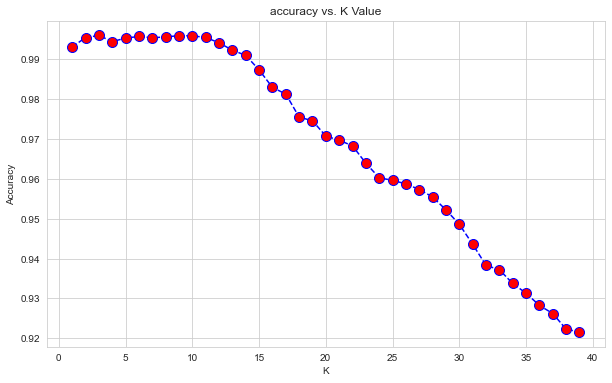

In [299]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.r2_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# Conclusions:

- Optimal k-value is 2. When k is 2, we're getting maximun accuracy of 0.9959071813120378.
- When model is trained using KNN algorithm which is built from scratch r2_score is 0.9953878875021323.
- When used sklearn KNN algorithm accuracy is 0.9959071813120378.
- Accuracy is almost same for both the models.